AdaBoostClassifier(base_estimator=None,n_estimators=50,learning_rate=1.0,algorithm='SAMME.R',random_state=None)

AdaBoostRegressor(base_estimator=None,n_estimators=50,learning_rate=1.0,loss='linear',random_state=None)

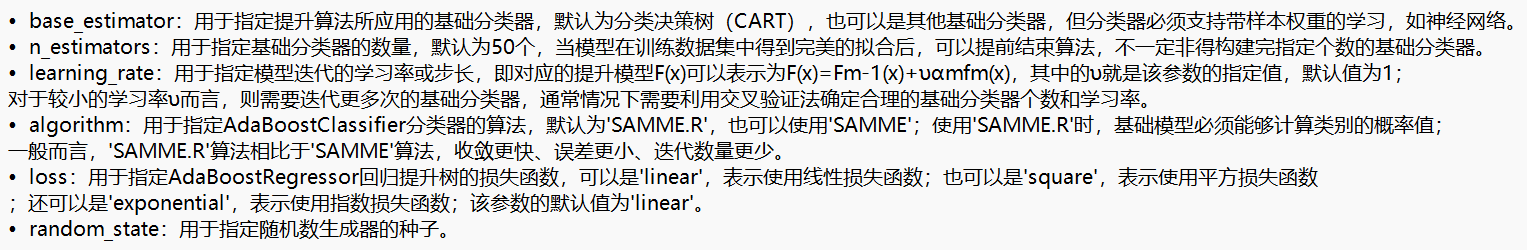

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

default = pd.read_csv("Credit_Card.csv")

In [2]:
default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
default.rename(columns={'default.payment.next.month':'y'},inplace=True)
default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


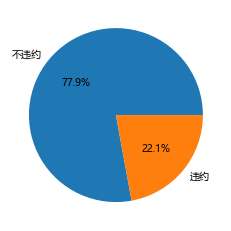

In [4]:
#为确保绘制的饼图是圆形，需执行以下代码
plt.axes(aspect='equal')
#中文乱码问题和坐标轴负号的问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
#统计客户是否违约的频数
counts = default.y.value_counts()

#绘制饼图
plt.pie(x=counts,labels = pd.Series(counts.index).map({0:'不违约',1:'违约'}),
       autopct='%.1f%%')
plt.show()

基于以上数据构建AdaBoost模型

In [5]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [6]:
#排除数据中的ID变量和因变量，剩余的数据用作自变量X
X = default.drop(['ID','y'],axis=1)
y=default.y

In [7]:
#数据拆分
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,random_state=1234)

In [8]:
#构建AdaBoost算法的类
AdaBoost1 = ensemble.AdaBoostClassifier()
#算法在训练数据集上的拟合
AdaBoost1.fit(X_train,y_train)
#算法在测试数据集上的预测
pred1 = AdaBoost1.predict(X_test)


In [9]:
#返回模型的预测效果
print('模型的准确率为:\n',metrics.accuracy_score(y_test,pred1))
print('模型发的评估报告:\n',metrics.classification_report(y_test,pred1))

模型的准确率为:
 0.8125333333333333
模型发的评估报告:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5800
           1       0.68      0.32      0.44      1700

    accuracy                           0.81      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.80      0.81      0.79      7500



基于如上的预测结果，绘制算法在测试数据集上的ROC曲线

In [10]:
#计算客户违约的概率值，用于生成ROC曲线的数据
y_score = AdaBoost1.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)

#计算AUC值
roc_auc = metrics.auc(fpr,tpr)

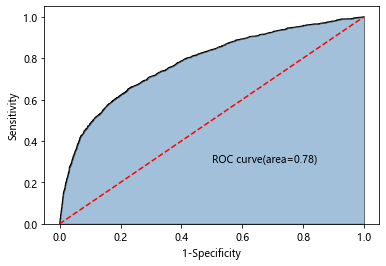

In [11]:
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')
#添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
#添加对角线
plt.plot([0,1],[0,1],color='red',linestyle='--')
#添加文本信息
plt.text(0.5,0.3,'ROC curve(area=%0.2f)'%roc_auc)
#添加X轴和Y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

ROC曲线下面的面积为0.78接近0.8，表现并不是特别突出

所以尝试调整模型参数来改善模型的预测准确率

在调参之前基于如上模型寻找客户是否违约的重要因素，进而再做一次特征筛选

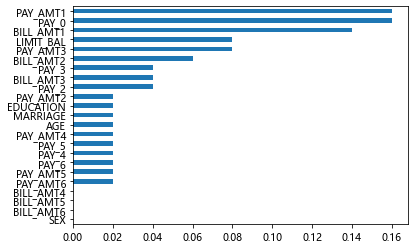

In [12]:
#自变量的重要性顺序
importance = pd.Series(AdaBoost1.feature_importances_,index=X.columns)
importance.sort_values().plot(kind='barh')
plt.show()

In [40]:
#取出重要性比较高的自变量建模
# predictors = list(importance[importance>0.02].index)
new_default = X_train.drop(columns = ['PAY_AMT2','EDUCATION','MARRIAGE','AGE','PAY_AMT4','PAY_5','PAY_4','PAY_6','PAY_AMT5','PAY_AMT6',
                                      'BILL_AMT4','BILL_AMT5','BILL_AMT6','SEX'],axis=1)

new_default

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT3
22918,120000.0,-1,-1,-1,1164.0,1844.0,-7809.0,1671.0,131062.0
8486,200000.0,-2,-2,-2,58147.0,1468.0,2321.0,1468.0,163597.0
9784,80000.0,0,0,0,31815.0,30672.0,33185.0,4038.0,914.0
26673,20000.0,0,0,0,13621.0,14984.0,16431.0,1596.0,3000.0
19946,90000.0,0,0,0,45406.0,47337.0,48575.0,3000.0,2000.0
...,...,...,...,...,...,...,...,...,...
27852,50000.0,2,0,0,48064.0,47691.0,49140.0,3000.0,3900.0
23605,210000.0,-1,-1,-1,1417.0,-3.0,355.0,0.0,12816.0
1318,390000.0,1,-2,-1,0.0,0.0,1266.0,0.0,0.0
25299,30000.0,0,0,0,24607.0,24430.0,23881.0,1700.0,1287.0


In [36]:
#用网络搜索法找个基础模型对应的合理参数组合吧
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [41]:
max_depth = [3,4,5,6]
params1 = {'base_estimator__max_depth':max_depth}
base_model = GridSearchCV(estimator = ensemble.AdaBoostClassifier(base_estimator = DecisionTreeClassifier()),param_grid=params1,
                           scoring='roc_auc',cv=5,n_jobs=4,verbose=1)
base_model.fit(new_default,y_train)
#返回参数的最佳组合和对应的AUC值
base_model.best_params_,base_mode.best_score_

OSError: [Errno 22] Invalid argument

这边有报错先不看了，得到base_estimator__max_depth是3，base_model.best_score_是0.744

基于这个结果对AdaBoost算法进行参数调优

In [16]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100,200,300]
learning_rate = [0.01,0.05,0.1,0.2]
params2 = {'n_estimators':n_estimators,'learning_rate':learning_rate}
adaboost = GridSearchCV(estimator = ensemble.AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3)),param_grid = params2,
                       scoring = 'roc_auc',cv=5,n_jobs=4,verbose=1)
adaboost.fit(X_train[predictors],y_train)

adaboost.best_params_,adaboost.best_score_

OSError: [Errno 22] Invalid argument

这边还是报错了，得到learning_rate为0.01，n_estimators为300，best_score为0.76866

基于以上调参结果重新构造AdaBoost模型，并检验算法在测试数据集上的预测效果

In [17]:
#使用最佳的参数组合构建AdaBoost模型
AdaBoost2 = ensemble.AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3),n_estimators = 300,learning_rate = 0.01)
#算法在训练数据集上的拟合
AdaBoost2.fit(X_train[predictors],y_train)
pred2 = AdaBoost2.predict(X_test[predictors])

In [18]:
print('模型的准确率为:\n',metrics.accuracy_score(y_test,pred2))
print('模型的评估报告为:\n',metrics.classification_report(y_test,pred2))

模型的准确率为:
 0.816
模型的评估报告为:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5800
           1       0.69      0.34      0.45      1700

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



只提高了0.35%，好像没什么用

# GBDT分类算法

如果损失函数选择为指数损失函数，GBDT算法实际上是退化的AdaBoost算法

如果损失函数为对数似然损失函数，GBDT算法的残差类似于Logistic回归的对数似然损失

GBDT算法计算过程：

1.初始化一个弱分类器

2.计算损失函数的负梯度值

3.利用数据集拟合下一轮基础模型

4.重复2和3并利用m个基础模型构建梯度提升模型

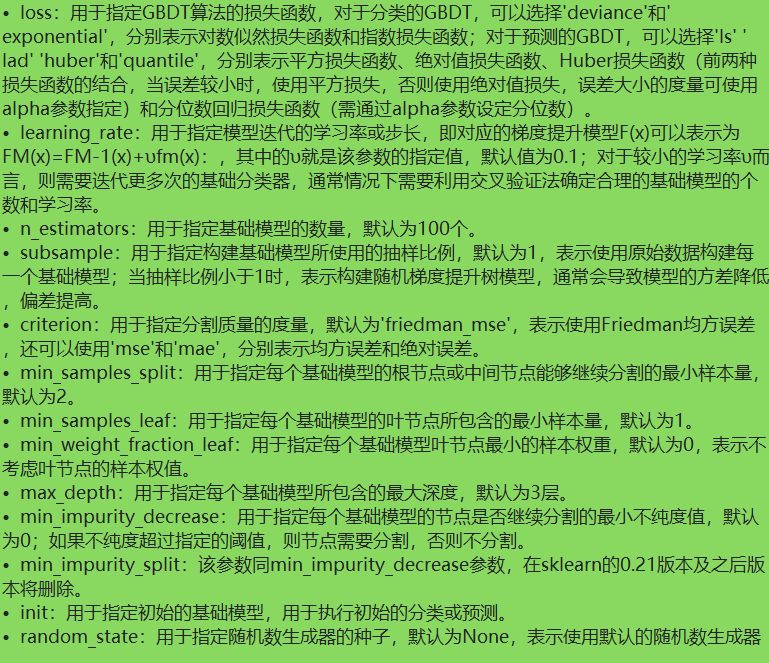

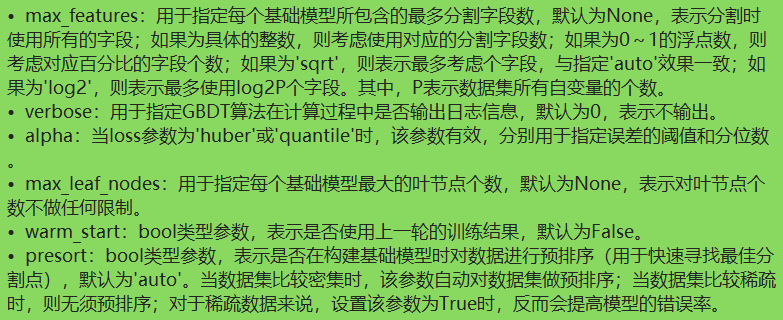

In [19]:
#s运用网格搜索法选择梯度提升树的合理参数组合
learning_rate = [0.01,0.05,0.1,0.2]
n_estimators = [100,200,300]
max_depth = [3,4,5,6]
params = {'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth}
gbdt_grid = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(),
                        param_grid = params,scoring = 'roc_auc',
                        cv=5,n_jobs=4,verbose=1)
gbdt_grid.fit(X_train[predictors],y_train)

#返回参数的最佳组合和对应的AUC值
gbdt_grid.best_params_,gbdt_grid.best_score_

OSError: [Errno 22] Invalid argument